# Task#3

In [1]:
import pandas as pd

# Load the hourly data

df_hourly = pd.read_csv("E:\\Internship\\Week 6\\archive\\hour.csv")

# Display the first few rows of the dataset
print(df_hourly.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [3]:
# Check the columns in the dataset
print(df_hourly.columns)

# Convert the 'dteday' column to a datetime object and combine it with 'hr' to create a full timestamp
df_hourly['datetime'] = pd.to_datetime(df_hourly['dteday']) + pd.to_timedelta(df_hourly['hr'], unit='h')

# Set the datetime as the index
df_hourly.set_index('datetime', inplace=True)

# Display the summary statistics
print(df_hourly.describe())


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.0

### Heat Maps

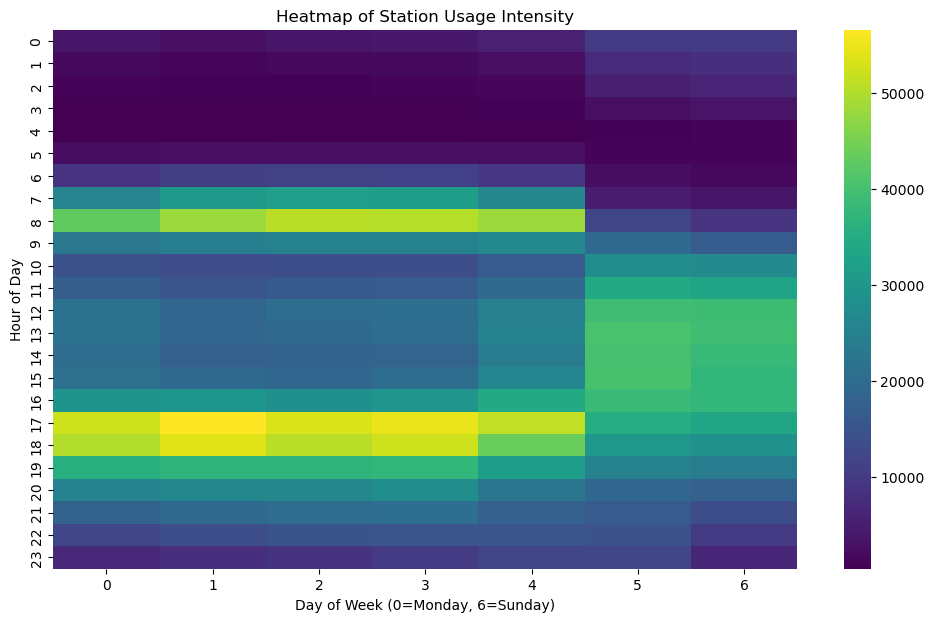

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
df_pivot = df_hourly.pivot_table(index=df_hourly.index.hour, columns=df_hourly.index.weekday, values='cnt', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 7
))
sns.heatmap(df_pivot, cmap='viridis')
plt.title('Heatmap of Station Usage Intensity')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Hour of Day')
plt.show()


## Scatter Plot

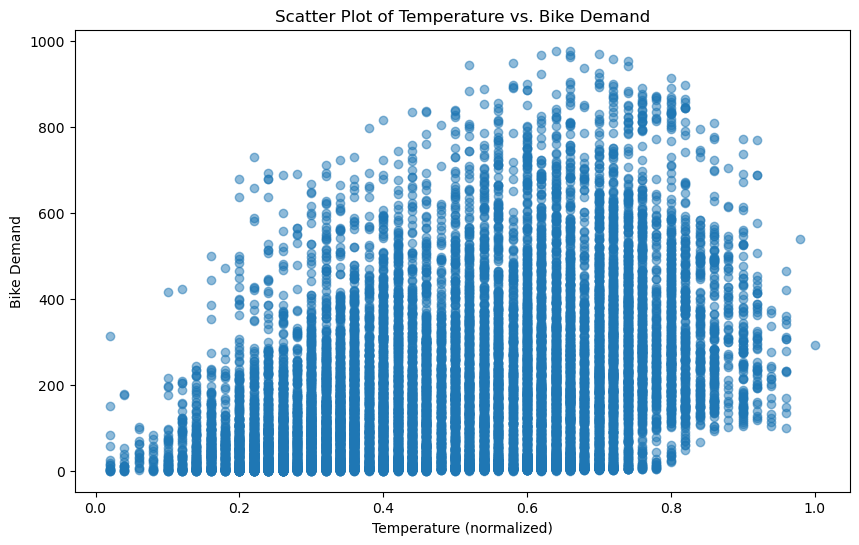

In [9]:
# Plotting a scatter plot to visualize demand vs. supply
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['temp'], df_hourly['cnt'], alpha=0.5)
plt.title('Scatter Plot of Temperature vs. Bike Demand')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Bike Demand')
plt.show()
